In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import zipfile
with zipfile.ZipFile("drive/My Drive/archive.zip","r") as zip_ref:
    zip_ref.extractall("CGAS_Project_dataset")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob
import cv2
from sklearn.preprocessing import normalize
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
# Import different classifiers
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from skimage.feature import hog, local_binary_pattern
import sklearn.preprocessing as prp
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import csr_matrix
from scipy import stats
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


PyTorch Version:  1.7.0+cu101
Initializing Datasets and Dataloaders...
cuda


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth



Epoch 0/2
----------
Current learning rate is 0.001
train Loss: 1.7061 Acc: 0.4067
valid Loss: 1.5877 Acc: 0.4440
Epoch 1/2
----------
Current learning rate is 0.001
train Loss: 1.4019 Acc: 0.5140
valid Loss: 1.1537 Acc: 0.6160
Epoch 2/2
----------
Current learning rate is 0.001
train Loss: 1.2359 Acc: 0.5747
valid Loss: 1.0394 Acc: 0.6580
Training complete in 0m 43s
Best val Acc: 0.658000


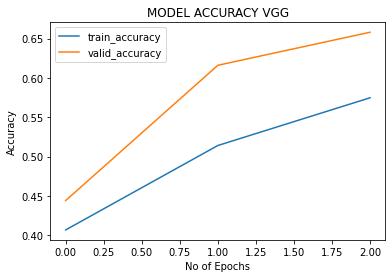

In [ ]:
#!/usr/bin/env python
# coding: utf-8

# In[3]:


from __future__ import print_function
from __future__ import division
import os
import numpy as np
from shutil import copyfile
from sklearn.model_selection import train_test_split, KFold
import shutil
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
from sklearn import metrics
import copy
#from data_utils import *
print("PyTorch Version: ",torch.__version__)
#print("Torchvision Version: ",torchvision.__version__)
import sys


# In[4]:


#argumentList = sys.argv
#b= sys.argv[1]
#c= sys.argv[2]

### Hyperparameters
b='alexnet_results'
batch_size = 8
input_size=224
data_dir = '/content/CGAS_Project_dataset/data/food-101-tiny/'
num_classes = 10
num_epochs = 3
model_path='alexnet.pth'
model_name='alexnet'
phase_name='test'
feature_extract = False

epochs= []
train_acc=[]
test_acc=[]
train_loss=[]
test_loss = []
classes=os.listdir('/content/CGAS_Project_dataset/data/food-101-tiny/train')


# In[5]:


def set_parameter_requires_grad(model, feature_extracting):
    if feature_extracting:
        for param in model.parameters():
            param.requires_grad = False
            
def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
    # Initialize these variables which will be set in this if statement. Each of these
    #   variables is model specific.
    model_ft = None
    input_size = 0

    if model_name == "resnet":
        """ Resnet18
        """
        model_ft = models.resnet18(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "alexnet":
        """ Alexnet
        """
        model_ft = models.alexnet(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "vgg":
        """ VGG11_bn
        """
        model_ft = models.vgg11_bn(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier[6].in_features
        model_ft.classifier[6] = nn.Linear(num_ftrs,num_classes)
        input_size = 224

    elif model_name == "squeezenet":
        """ Squeezenet
        """
        model_ft = models.squeezenet1_0(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
        model_ft.num_classes = num_classes
        input_size = 224

    elif model_name == "densenet":
        """ Densenet
        """
        model_ft = models.densenet121(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        num_ftrs = model_ft.classifier.in_features
        model_ft.classifier = nn.Linear(num_ftrs, num_classes)
        input_size = 224

    elif model_name == "inception":
        """ Inception v3
        Be careful, expects (299,299) sized images and has auxiliary output
        """
        model_ft = models.inception_v3(pretrained=use_pretrained)
        set_parameter_requires_grad(model_ft, feature_extract)
        # Handle the auxilary net
        num_ftrs = model_ft.AuxLogits.fc.in_features
        model_ft.AuxLogits.fc = nn.Linear(num_ftrs, num_classes)
        # Handle the primary net
        num_ftrs = model_ft.fc.in_features
        model_ft.fc = nn.Linear(num_ftrs,num_classes)
        input_size = 299

    else:
        print("Invalid model name, exiting...")
        exit()

    return model_ft, input_size

class StainNet(torch.nn.Module):

    def __init__(self):
        super(StainNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, stride=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=2)
        self.bn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 32, 3, stride=1)
        self.bn3 = nn.BatchNorm2d(32)
        self.conv4 = nn.Conv2d(32, 48, 3, stride=2)
        self.bn4 = nn.BatchNorm2d(48)
        self.conv5 = nn.Conv2d(48, 48, 3, stride=1)
        self.bn5 = nn.BatchNorm2d(48)
        self.conv6 = nn.Conv2d(48, 64, 3, stride=2)
        self.bn6 = nn.BatchNorm2d(64)
        self.gap = nn.AvgPool2d(13)
        self.fc1 = nn.Linear(64, 855)
        self.logsoft= nn.LogSoftmax()

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = self.gap(x)
        x = x.view(-1, 64)
        x = self.logsoft(self.fc1(x))
        return x



def lr_scheduler(optimizer, init_lr, epoch):


    for param_group in optimizer.param_groups:

        if epoch == 10 or epoch == 30:
            param_group['lr']=param_group['lr']/10

        if epoch == 0:
            param_group['lr']=init_lr

        print('Current learning rate is {}'.format(param_group['lr']))


    return optimizer

epochs_plot=[]


def train_model(model, dataloaders, criterion, optimizer_s, lrate, num_epochs):
    since = time.time()

    val_acc_history = []

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0


    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        optimizer  = lr_scheduler(optimizer_s, lrate, epoch)

        # Each epoch has a training and validation phase)    
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    # Get model outputs and calculate loss
                    # Special case for inception because in training it has an auxiliary output. In train
                    #   mode we calculate the loss by summing the final output and the auxiliary output
                    #   but in testing we only consider the final output.

                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    _, preds = torch.max(outputs, 1)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            if phase == 'train':
                train_acc.append(epoch_acc)
                train_loss.append(epoch_loss)

            else:
                test_acc.append(epoch_acc)
                test_loss.append(epoch_loss)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
            if phase == 'valid':
                val_acc_history.append(epoch_acc)
        # plots(epoch, train_acc, test_acc, train_loss, test_loss,b)
        #to_csv(b+'.csv',( train_acc,test_acc,train_loss,test_loss,epoch))
        epochs_plot.append(epoch)
        # if(epoch%100==0):
        #     torch.save(model, model_path[:-4]+str(epoch)+'.pth')


    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    plt.plot(epochs_plot,train_acc,label='train_accuracy')
    plt.plot(epochs_plot,test_acc,label='valid_accuracy')
    plt.xlabel("No of Epochs")
    plt.ylabel("Accuracy")
    plt.title("MODEL ACCURACY VGG")
    plt.legend()
    plt.show()

    

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history


# In[7]:


data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(input_size),
        #transforms.Resize(input_size),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}
print("Initializing Datasets and Dataloaders...")


# In[32]:


# Detect if we have a GPU available
#device = torch.device("cuda:"+str(c) if torch.cuda.is_available() else "cpu")
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
def train(model_path,device):
    # Cre{ate training and validation and test datasets

    # model = models.squeezenet1_0(pretrained=True)
    # model.classifier[1] = nn.Conv2d(512, 2, kernel_size=(1,1), stride=(1,1))
    # model.num_classes = 2
    feature_extract = False

    # Initialize the model for this run
    model, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)
    #model.load_state_dict(torch.load('alexnet65.pth'))
    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'valid']}
    # Create training and validation and test dataloaders
    dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'valid']}


    # Send the model to GPU
    # model = StainNet()
    model = model.to(device)
    params_to_update = model.parameters()
    optimizer = optim.SGD(params_to_update, lr=0.001, momentum=0.9)

    # Setup the loss fxn
    criterion = nn.CrossEntropyLoss()
    # criterion = nn.NLLLoss()
    # Train and evaluate
    model_ft, hist = train_model(model, dataloaders, criterion, optimizer, 0.001, num_epochs=num_epochs)
    torch.save(model_ft, model_path)

def test(model_path,device,phase_name):
    # Cre{ate training and validation and test datasets
    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in [phase_name]}
    # Create training and validation and test dataloaders
    dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in [phase_name]}
    running_corrects = 0
    tp=0
    tn=0
    fp=0
    fn=0
    # model=StainNet()
    # model.load_state_dict(torch.load(model_path).state_dict())
    
    model = models.densenet121(pretrained='False')
    set_parameter_requires_grad(model, feature_extract)
    num_ftrs = model.classifier.in_features
    model.classifier = nn.Linear(num_ftrs, num_classes)
    model.load_state_dict(torch.load(model_path).state_dict())
    #################################
    model.eval()
    model = model.to(device)
    label_data=np.array((0,))
    pred_data=np.array((0,))
    for inputs, labels in dataloaders[phase_name]:

        # for transformation visualisation
        # if(trial==0):
        #     print(inputs.shape)
        #     for i in range(inputs.shape[0]):
        #         save_image(inputs[i], 'visualisations/'+e+'/img'+str(i)+'.png')
        #     trial+=1
        
        inputs = inputs.to(device)
        # labels = labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        preds=preds.cpu()
        pred_data=np.append(pred_data,preds.numpy())
        label_data=np.append(label_data,labels.data.numpy())
        # aux=(labels.data-preds).numpy()
        # num_zero=(preds.numpy()==0).sum()
        # num_ones=(preds.numpy()==1).sum()
        # FN=(aux==1).sum()
        # FP=(aux==-1).sum()
        # tn+=num_zero-FN
        # tp+=num_ones-FP
        # fn+=FN
        # fp+=FP

        # running_corrects += torch.sum(preds == labels.data)

    # acc = running_corrects.double() / len(dataloaders[phase_name].dataset)
    # precision=tp/(tp+fp)
    # recall=tp/(tp+fn)
    # specificity=tn/(tn+fp)
    # F1 = 2 * (precision * recall) / (precision + recall)
    confusion=metrics.confusion_matrix(label_data, pred_data)
    f1=metrics.f1_score(label_data,pred_data,average=None)
    acc=metrics.accuracy_score(label_data,pred_data)
    balanced_acc=metrics.balanced_accuracy_score(label_data,pred_data)
    print('Accuracy: '+str(acc))
    print('Balanced Accuracy: '+str(balanced_acc))
    print('F1: '+str(np.mean(f1)))
    print(confusion)
    np.save('confusion.npy',confusion)
    #metrics.ConfusionMatrixDisplay(np.array(confusion)).plot(include_values=True,xticks_rotation='vertical')
    #plt.savefig('confusion.png')


#############################################################################################################################################################################
#############################################################################################################################################################################
#############################################################################################################################################################################


# In[ ]:


#test(model_path,device,phase_name)
train(model_path,device)


# In[ ]:





In [ ]:
def predict_image(image):
    image_tensor = data_transforms[image]
    image_tensor = image_tensor.unsqueeze_(0)
    input = Variable(image_tensor)
    input = input.to(device)
    model=models.load('alexnet.pth')
    output = model(input)
    index = output.data.cpu().numpy().argmax()
    return index

In [ ]:
print(train_accuracy_plot)
print(valid_accuracy_plot)

[[tensor(0.4033, device='cuda:0', dtype=torch.float64), tensor(0.5367, device='cuda:0', dtype=torch.float64)], [tensor(0.4033, device='cuda:0', dtype=torch.float64), tensor(0.5367, device='cuda:0', dtype=torch.float64)]]
[[tensor(0.5720, device='cuda:0', dtype=torch.float64), tensor(0.6400, device='cuda:0', dtype=torch.float64)], [tensor(0.5720, device='cuda:0', dtype=torch.float64), tensor(0.6400, device='cuda:0', dtype=torch.float64)]]


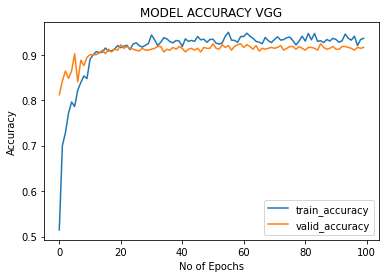

In [ ]:
    plt.plot(epochs_plot,train_acc,label='train_accuracy')
    plt.plot(epochs_plot,test_acc,label='valid_accuracy')
    plt.xlabel("No of Epochs")
    plt.ylabel("Accuracy")
    plt.title("MODEL ACCURACY VGG")
    plt.legend()
    plt.show()

In [ ]:
epochs_plot=[]
train_accuracy_plot=[]
valid_accuracy_plot=[]
for i in range(10):
  epochs_plot.append(i)
  train_accuracy_plot.append(1000*i)
  valid_accuracy_plot.append(100*i)

In [ ]:
print(train_acc)

[tensor(0.4033, device='cuda:0', dtype=torch.float64), tensor(0.5367, device='cuda:0', dtype=torch.float64)]


TypeError: ignored

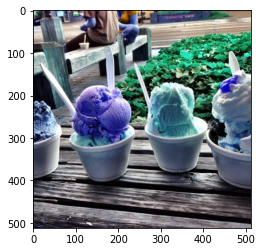

In [ ]:
new_image=cv2.imread('/content/1918103.jpg')
plt.imshow(new_image)
ans=predict_image(new_image)

In [ ]:
print(ans)